# Loading the Dataset and Handling Missing Values:

In [16]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv('train.csv')
train_df.head()


,Num,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,3,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,5,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [17]:

# Fill missing values with 'Unknown' or the most frequent value
train_df['Defect_of_vehicle'].fillna('Unknown', inplace=True)
train_df['Service_year_of_vehicle'].fillna('Unknown', inplace=True)
train_df['Work_of_casuality'].fillna(train_df['Work_of_casuality'].mode()[0], inplace=True)
train_df['Fitness_of_casuality'].fillna(train_df['Fitness_of_casuality'].mode()[0], inplace=True)
train_df['Type_of_vehicle'].fillna(train_df['Type_of_vehicle'].mode()[0], inplace=True)
train_df['Driving_experience'].fillna(train_df['Driving_experience'].mode()[0], inplace=True)
train_df['Educational_level'].fillna(train_df['Educational_level'].mode()[0], inplace=True)
train_df['Vehicle_driver_relation'].fillna(train_df['Vehicle_driver_relation'].mode()[0], inplace=True)
train_df['Owner_of_vehicle'].fillna(train_df['Owner_of_vehicle'].mode()[0], inplace=True)
train_df['Lanes_or_Medians'].fillna(train_df['Lanes_or_Medians'].mode()[0], inplace=True)
train_df['Vehicle_movement'].fillna(train_df['Vehicle_movement'].mode()[0], inplace=True)
train_df['Area_accident_occured'].fillna(train_df['Area_accident_occured'].mode()[0], inplace=True)
train_df['Road_surface_type'].fillna(train_df['Road_surface_type'].mode()[0], inplace=True)
train_df['Road_allignment'].fillna(train_df['Road_allignment'].mode()[0], inplace=True)
train_df['Type_of_collision'].fillna(train_df['Type_of_collision'].mode()[0], inplace=True)



In [18]:
# Check for any remaining missing values
print(train_df.isnull().sum())


Num                            0
Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian

# Converting the 'Time' Column to Datetime and Extracting the Hour:

In [19]:
# Convert 'Time' column to datetime format and extract the hour
train_df['Time'] = pd.to_datetime(train_df['Time'], format='%H:%M', errors='coerce')
train_df['Hour'] = train_df['Time'].dt.hour

# Display the first few rows to confirm changes
print(train_df[['Time', 'Hour']].head())


  Time  Hour
0  NaT   NaN
1  NaT   NaN
2  NaT   NaN
3  NaT   NaN
4  NaT   NaN


# Exploratory Data Analysis (EDA):
Analyze Accident Distribution by Time of Day:

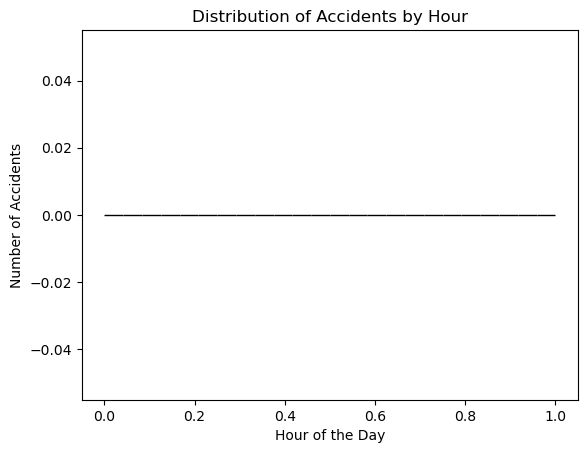

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of accidents by hour
sns.histplot(train_df['Hour'], bins=24, kde=False)
plt.title('Distribution of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()


# Analyze the Impact of Road Conditions and Weather:

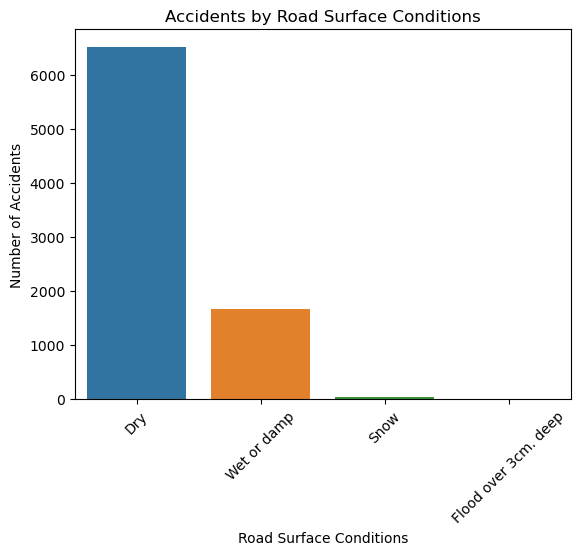

In [21]:
# Plot accidents by road surface conditions
sns.countplot(data=train_df, x='Road_surface_conditions')
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()




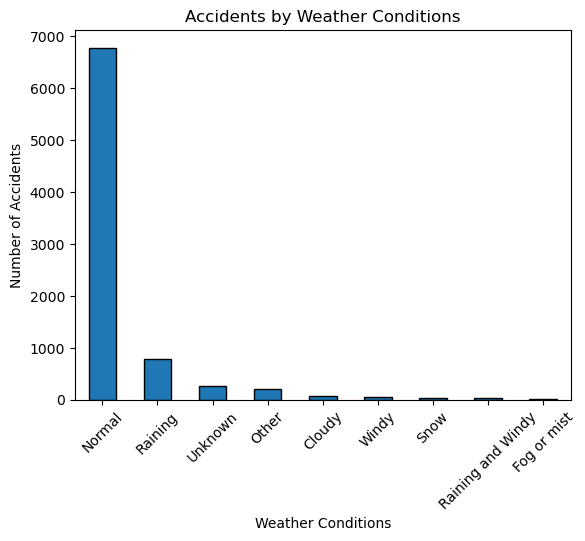

In [22]:
# Plot accidents by weather conditions
train_df['Weather_conditions'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Based on the findings, we recommend the following actions:
1. **Targeted Interventions**:
   - Deploy targeted interventions during peak accident hours, such as increased traffic monitoring and public awareness campaigns.

2. **Road Maintenance**:
   - Prioritize maintenance and improvements for road conditions that are prone to accidents, especially during adverse weather conditions.

3. **Weather-Appropriate Measures**:
   - Implement weather-specific driving advisories and enhance infrastructure to mitigate the impact of adverse weather on road safety.


In [23]:
#Thank You!!